In [320]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# FFT 1D

Sampling parameters

In [321]:
Fs = 150 # sampling rate
Ts = 1.0/Fs # sampling in interval
t = np.arange(0,1,Ts) # time vector

Signal series parameters

In [322]:
ff = 10 #signal frequency
y = np.sin(2*np.pi*ff*t)
n = len(y) # length of the signal vector

#optional
freq = np.fft.fftfreq(n,T/Fs) # calculate set of frequencies of signal with sign(!)
#print(freq)
#print(np.fft.fftshift(freq)) # set frequencies in rigth sequence
#optional


k = np.arange(n) # integer number series since 0  
T = n/Fs

frq = k/T # for multiple frequencies
#print(frq)
#frq = frq[range(int(n/2))] # one side frequency range. Is it equal to fftshift?

FFT

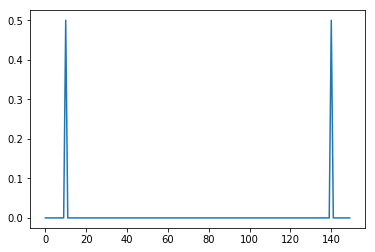

In [323]:
Y = np.fft.fft(y)/n # computing + normalization
#print(Y)
plt.plot(abs(Y)) # frequencies are not symmetrical relative to zero
#Frequencies are not shifted
#plt.plot(abs(Y))

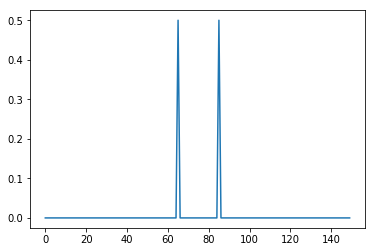

In [324]:
plt.plot(abs(np.fft.fftshift(Y))) # shift zero components to center

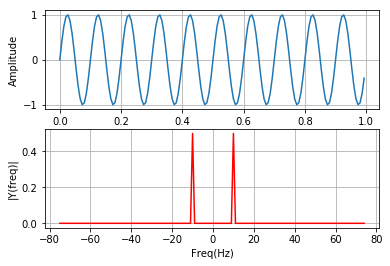

In [327]:
#Y = Y[range(int(n/2))]
Y = np.fft.fftshift(Y)
#freq = np.fft.fftfreq(n, d = T/Fs)# it is computed above
freq = np.fft.fftshift(freq)

fig, ax = plt.subplots(2,1)
ax[0].plot(t,y)
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Amplitude")

ax[1].plot(freq, abs(Y), 'r')
ax[1].set_xlabel('Freq(Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[0].grid()
ax[1].grid()

# Delta function

In [328]:
y = np.zeros((1,n))
y[0,0] = 1

k = np.arange(n)   
T = n/Fs

frq = k/T 
frq = frq[range(int(n/2))] 
Y = np.fft.fft(y[0:])/n 
#print(Y)
#plt.plot(abs(Y)) # 
print(Y.shape)
#Y = Y[range(int(n/2))]

#plt.plot(frq, np.abs(Y), 'r')
#plt.grid()

#Why it does not work?

(1, 150)


# FFT 2D

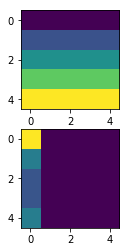

In [329]:
a = np.mgrid[:5, :5][0]
a_fft = np.fft.fft2(a)


fig, ax = plt.subplots(2,1)
ax[0].imshow(a)
ax[1].imshow(np.abs(a_fft))

[-0.42857143 -0.28571429 -0.14285714  0.          0.14285714  0.28571429
  0.42857143] [-0.42857143 -0.28571429 -0.14285714  0.          0.14285714  0.28571429
  0.42857143]


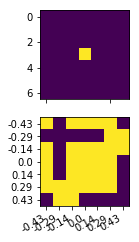

In [333]:
a = np.zeros((7,7))
a[3,3] = 1
a_fft = np.fft.fft2(a)


x_ax = np.fft.fftfreq(a.shape[0], d = 1)
y_ax = np.fft.fftfreq(a.shape[1], d = 1)
x_ax = np.fft.fftshift(x_ax)
y_ax = np.fft.fftshift(y_ax)
print(x_ax, y_ax)

fig, ax = plt.subplots(2,1)
ax[0].imshow(a)
ax[1].imshow(np.abs(a_fft))

plt.xticks(range(len(x_ax)), np.round(x_ax,2))
plt.yticks(range(len(y_ax)), np.round(y_ax,2))

fig.autofmt_xdate()

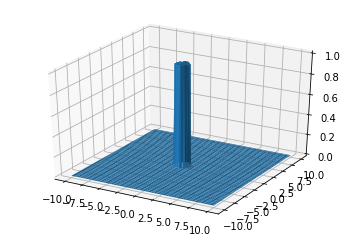

In [338]:
numb_steps = 100
x = np.linspace(-10, 10, numb_steps)
y = np.linspace(-10, 10, numb_steps)



R = 1

X,Y = np.meshgrid(x,y)
Z = X**2+Y**2
R = 1
Z[Z > R] = 0;Z[Z > 0] = 1; 
            
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z)

x_ax = np.fft.fftfreq(Z.shape[0], d = 1)
y_ax = np.fft.fftfreq(Z.shape[1], d = 1)
x_ax = np.fft.fftshift(x_ax)
y_ax = np.fft.fftshift(y_ax)





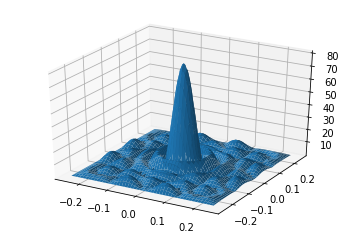

In [341]:
fig = plt.figure()
ax = fig.gca(projection='3d')


Z_fft = np.fft.fft2(Z)
FreqCompRows = np.fft.fftfreq(Z.shape[0],d=2)
FreqCompCols = np.fft.fftfreq(Z.shape[1],d=2)

#print(FreqCompRows, FreqCompCols)
FreqCompRows = np.fft.fftshift(FreqCompRows)
FreqCompCols = np.fft.fftshift(FreqCompCols)

S,D = np.meshgrid(FreqCompRows, FreqCompCols)

ax.plot_surface(S, D, np.abs(np.fft.fftshift(Z_fft))) # WTF?

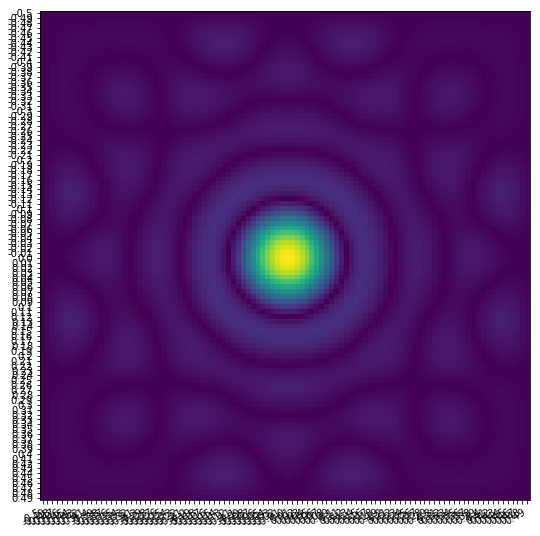

In [347]:
fig, ax = plt.subplots(figsize=(10, 10))

Z_fft = np.fft.fft2(Z)
FreqCompRows = np.fft.fftfreq(Z.shape[0],d=2)
FreqCompCols = np.fft.fftfreq(Z.shape[1],d=2)
FreqCompRows = np.fft.fftshift(FreqCompRows)
FreqCompCols = np.fft.fftshift(FreqCompCols)

plt.xticks(range(len(x_ax)), np.round(x_ax,2))
plt.yticks(range(len(y_ax)), np.round(y_ax,2))



ax.imshow(np.abs(np.fft.fftshift(Z_fft)))

fig.autofmt_xdate() # You should make it better

## Born Approximation

In [479]:
x = np.linspace(0.1,10,10)
y = np.linspace(0.1,10,10)
z = np.linspace(0.1,10,10)

X_, Y_ = np.meshgrid(x,y)
Y_, Z_ = np.meshgrid(y,z)

X,Y,Z = np.mgrid[0:10, 0:10, 0:10]

V = np.exp(-np.sqrt(X**2+Y**2+Z**2))/np.sqrt(X**2+Y**2+Z**2)

print(X.shape, Y.shape, Z.shape, V.shape)

(10, 10, 10) (10, 10, 10) (10, 10, 10) (10, 10, 10)


/home/vapour3005/Desktop/PyProjects/Phys/env/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [480]:
V_fft = np.fft.fftn(V)
print(V.shape)

(10, 10, 10)


In [454]:
m = 1
h_bar = 1
scat_amp = - (2/4/np.pi/h_bar**2) * V_fft
diff_cs_sq = np.power(scat_amp,2)

In [455]:
print(diff_cs_sq.shape)

(10, 10, 10)


In [456]:
#np.mgrid[:3, :3, :3]

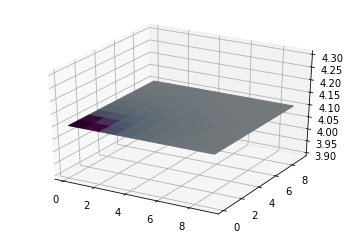

In [463]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

T = np.sin(Y+Z+np.sin(X))

ax.plot_surface(X[:,:,4], Y[:,:,4], Z[:,:,4], facecolors=cm.BuPu(V[:,:,0]))#, rstride=1, cstride=1, facecolors=cm.jet(np.abs(diff_cs_sq)))
plt.show()

# Example of 4d plot

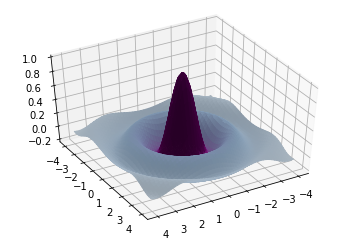

In [430]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# create some fake data
x = y = np.arange(-4.0, 4.0, 0.02)
# here are the x,y and respective z values
X, Y = np.meshgrid(x, y)
Z = np.sinc(np.sqrt(X*X+Y*Y))
# this is the value to use for the color
#V = np.sin(Y)
V = 1/np.sqrt(X**2+Y**2)

# create the figure, add a 3d axis, set the viewing angle
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45,60)

# here we create the surface plot, but pass V through a colormap
# to create a different color for each patch
ax.plot_surface(X, Y, Z, facecolors=cm.BuPu(V))
plt.show()

## Example of 3d fft

In [558]:
a = 1

x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
z = np.linspace(-10,10,100)


#X,Y,Z = np.mgrid[x, y, z]

X,Y,Z = np.mgrid[-10:10, -10:10, -10:10]

r_sq = X**2+Y**2+Z**2
my_fft_ = np.fft.fftn(np.exp(-a*r_sq))

In [559]:
print(my_fft.shape)

(20,)


In [560]:
print(my_fft_[:,0,0])

[ 5.57005625 +0.00000000e+00j -5.43459903 +8.60422844e-16j
  5.04796467 -1.36002321e-15j -4.46485537 +1.40859546e-15j
  3.76292062 +0.00000000e+00j -3.02713900 +7.36231782e-18j
  2.33532237 +7.11510610e-16j -1.74849040 -1.38415268e-15j
  1.30765791 +0.00000000e+00j -1.03612950 -7.69182449e-16j
  0.94463922 +1.64923085e-15j -1.03612950 -2.18545204e-15j
  1.30765791 +0.00000000e+00j -1.74849040 -5.60947603e-16j
  2.33532237 +4.89269571e-16j -3.02713900 -1.71282483e-16j
  3.76292062 +0.00000000e+00j -4.46485537 +4.62344891e-16j
  5.04796467 -1.48998782e-15j -5.43459903 +2.33229175e-15j]


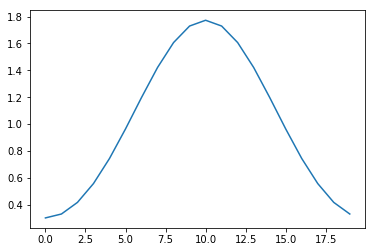

In [561]:
plt.plot(np.abs(np.fft.fftshift(my_fft_[:,0,0]))/np.pi)

In [562]:
x = np.linspace(-10,10,20)
my_fft = np.fft.fft(np.exp(-a*x**2))

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]


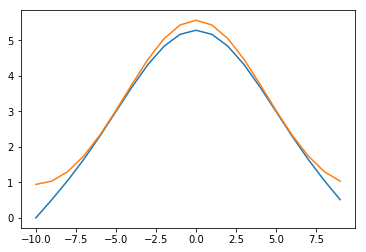

In [563]:
x_ = np.arange(-10,10)
print(x_)

plt.plot(x_, np.abs(np.fft.fftshift(my_fft))*np.pi, x_, np.abs(np.fft.fftshift(my_fft_[:,0,0])) )